# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
powers_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print('heroes_df')
heroes_df.describe()

heroes_df


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [5]:
print('powers_df')
powers_df.describe()

powers_df


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Darkstar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [6]:
print('heroes_df')
heroes_df.info()

heroes_df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [7]:
print('powers_df')
powers_df.info()

powers_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [8]:
def get_nan_rows(data: pd.DataFrame):
    return data[data.isna().any(axis=1)]

In [9]:
def who_is_missing(data: pd.DataFrame, col: str, name_col: str):
    return get_nan_rows(data)[data[col].isna()][name_col].values

In [10]:
def get_missing_value_info(data: pd.DataFrame):
    missing = pd.DataFrame(data.isna().sum(), columns=['Total'])
    missing['Percent'] = (missing['Total'] / data.index.size) * 100
    return missing.sort_values('Total', ascending=False)

In [11]:
def print_categorical_uniques(data: pd.DataFrame, skip=None):
    cat_cols = data.columns[(data.dtypes == 'object') | (data.dtypes == 'bool')]
    if skip:
        cat_cols = [x for x in cat_cols if x not in skip]
    for col in cat_cols:
        print(col)
        print('-'*len(col))
        print(data[col].unique())
        print('\n')

In [12]:
def show_numerical_value_counts(data: pd.DataFrame):
    is_numeric = data.dtypes.map(pd.api.types.is_numeric_dtype)
    num_only = data[data.columns[is_numeric]]
    for col in num_only.columns:
        display(num_only[col].value_counts().head())

## heroes_df

In [13]:
get_missing_value_info(heroes_df)

,Total,Percent
Publisher,15,2.043597
Weight,2,0.272480
name,0,0.000000
Gender,0,0.000000
Eye color,0,0.000000
Race,0,0.000000
Hair color,0,0.000000
Height,0,0.000000
Skin color,0,0.000000
Alignment,0,0.000000


### Initial NaN check
- Looks like there are a small number of NaNs in the `Publisher` and `Weight` features of `heroes_df`.
    - `Publisher` has NaNs for 15 (2%) of its values.
    - `Weight` has NaNs for 2 (0.3%) of its values.
- '-' appears to be used a placeholder in several columns.

In [14]:
print_categorical_uniques(heroes_df, skip=['name'])

Gender
------
['Male' 'Female' '-']


Eye color
---------
['yellow' 'blue' 'green' 'brown' '-' 'red' 'violet' 'white' 'purple'
 'black' 'grey' 'silver' 'yellow / red' 'yellow (without irises)' 'gold'
 'blue / white' 'hazel' 'green / blue' 'white / red' 'indigo' 'amber'
 'yellow / blue' 'bown']


Race
----
['Human' 'Icthyo Sapien' 'Ungaran' 'Human / Radiation' 'Cosmic Entity' '-'
 'Cyborg' 'Xenomorph XX121' 'Android' 'Vampire' 'Mutant' 'God / Eternal'
 'Symbiote' 'Atlantean' 'Alien' 'Neyaphem' 'New God' 'Alpha' 'Bizarro'
 'Inhuman' 'Metahuman' 'Demon' 'Human / Clone' 'Human-Kree'
 'Dathomirian Zabrak' 'Amazon' 'Human / Cosmic' 'Human / Altered'
 'Kryptonian' 'Kakarantharaian' 'Zen-Whoberian' 'Strontian' 'Kaiju'
 'Saiyan' 'Gorilla' 'Rodian' 'Flora Colossus' 'Human-Vuldarian'
 'Asgardian' 'Demi-God' 'Eternal' 'Gungan' 'Bolovaxian' 'Animal'
 'Czarnian' 'Martian' 'Spartoi' 'Planet' 'Luphomoid' 'Parademon' 'Yautja'
 'Maiar' 'Clone' 'Talokite' 'Korugaran' 'Zombie' 'Human-Vulcan'
 'Human-Spart

In [15]:
show_numerical_value_counts(heroes_df)

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64

-99.0    237
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64

### Placeholder check
 - Looks like '-' is used as a placeholder for missing categorical data in `heroes_df`.
 - Looks like -99.0 is used as a placeholder for missing numeric data in `heroes_df`.

In [16]:
# Replace placeholders with NaNs
heroes_df = heroes_df.replace(['-', -99.0], np.nan)
get_missing_value_info(heroes_df)

,Total,Percent
Skin color,662,90.190736
Race,304,41.416894
Weight,239,32.561308
Height,217,29.564033
Eye color,172,23.433243
Hair color,172,23.433243
Gender,29,3.950954
Publisher,15,2.043597
Alignment,7,0.953678
name,0,0.000000


In [17]:
# Show who is missing the given feature
col = 'Alignment'
display(who_is_missing(heroes_df, col, 'name'))
heroes_df[col].value_counts(normalize=True)

array(['Anti-Venom', 'Blackwulf', 'Brundlefly', 'Man of Miracles', 'Q',
       'Trickster', 'Venompool'], dtype=object)

good       0.682256
bad        0.284732
neutral    0.033012
Name: Alignment, dtype: float64

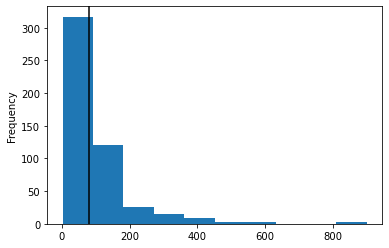

In [18]:
ax = heroes_df['Weight'].plot.hist()
ax.axvline(heroes_df['Weight'].median(), color='Black')

### Dealing with the missing values
- The heroes missing values for `Publisher` make sense as unassociated with any clear publisher. Let's treat them as a new category.
- 90% of heroes are missing `Skin color`, and not because they don't have skin colors. Let's drop the column.
- 40% of heroes are missing `Race`, but since 48% of heroes are human (the mode, by a wide margin) let's fill with that.
- 3% of heroes are missing `Gender`, but since the dataset is 72% male, let's fill with that (the mode).
- Let's fill missing `Height` and `Weight` values with the median, even though there are numerous outliers.
- The 23% of observations which are missing `Eye color` and `Hair color` can be filled in with mode, though it pains me a bit.
- The 1% of observations which are missing `Alignment` seem ambiguous enough to deserve their own category.


In [19]:
heroes_fill = {
    'Publisher': 'No Publisher',
    'Race': heroes_df['Race'].mode()[0],
    'Gender': heroes_df['Gender'].mode()[0],
    'Height': heroes_df['Height'].median(),
    'Weight': heroes_df['Weight'].median(),
    'Eye color': heroes_df['Eye color'].mode()[0],
    'Hair color': heroes_df['Hair color'].mode()[0],
    'Alignment': 'No Alignment'
}
heroes_fill

{'Publisher': 'No Publisher',
 'Race': 'Human',
 'Gender': 'Male',
 'Height': 183.0,
 'Weight': 81.0,
 'Eye color': 'blue',
 'Hair color': 'Black',
 'Alignment': 'No Alignment'}

In [20]:
heroes_df = heroes_df.fillna(heroes_fill).drop(columns=['Skin color'])

## powers_df

In [21]:
get_missing_value_info(powers_df)

,Total,Percent
hero_names,0,0.0
Power Cosmic,0,0.0
Enhanced Smell,0,0.0
Illusions,0,0.0
Thirstokinesis,0,0.0
...,...,...
Projection,0,0.0
Summoning,0,0.0
Enhanced Memory,0,0.0
Reflexes,0,0.0


In [22]:
print_categorical_uniques(powers_df)

hero_names
----------
['3-D Man' 'A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas'
 'Absorbing Man' 'Adam Monroe' 'Adam Strange' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly' 'Alien'
 'Allan Quatermain' 'Amazo' 'Ammo' 'Ando Masahashi' 'Angel' 'Angel Dust'
 'Angel Salvadore' 'Angela' 'Animal Man' 'Annihilus' 'Ant-Man'
 'Ant-Man II' 'Anti-Monitor' 'Anti-Spawn' 'Anti-Venom' 'Apocalypse'
 'Aquababy' 'Aqualad' 'Aquaman' 'Arachne' 'Archangel' 'Arclight' 'Ardina'
 'Ares' 'Ariel' 'Armor' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II'
 'Atom III' 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bananaman'
 'Bane' 'Banshee' 'Bantam' 'Batgirl' 'Batgirl IV' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Ben 10'
 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdman' 'Bishop' 'Bizarro' 'Bizarro-Girl'
 

In [23]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


### Missing values in `powers_df`
There are no NaNs or placeholders of any kind in `powers_df`. It's 1 column of strings and 167 columns of booleans. That's convenient.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [24]:
display(heroes_df.shape, powers_df.shape)
df = heroes_df.merge(powers_df, how='inner', left_on='name', right_on='hero_names')
df.head()

(734, 9)

(667, 168)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,hero_names,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,A-Bomb,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,Abe Sapien,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,Abin Sur,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,Abomination,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,bad,81.0,Abraxas,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Establish that `name` and `hero_names` are equivalent
(df['name'] == df['hero_names']).value_counts(normalize=True)

True    1.0
dtype: float64

In [26]:
# Drop `hero_names`
df.drop(columns=['hero_names'], inplace=True)

In [27]:
# Show duplicates
df[df['name'].duplicated(keep=False)].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
20,Angel,Male,blue,Human,Blond,183.0,Marvel Comics,good,68.0,True,...,False,False,False,False,False,False,False,False,False,False
21,Angel,Male,blue,Vampire,Black,183.0,Dark Horse Comics,good,81.0,True,...,False,False,False,False,False,False,False,False,False,False
44,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,good,101.0,False,...,False,False,False,False,False,False,False,False,False,False
45,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,bad,126.0,False,...,False,False,False,False,False,False,False,False,False,False
46,Atom,Male,blue,Human,Red,178.0,DC Comics,good,68.0,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Drop duplicates from `name` column
df.drop_duplicates(subset=['name'], inplace=True, ignore_index=True)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0.5, 1.0, 'Hero Height vs. Weight by Gender')

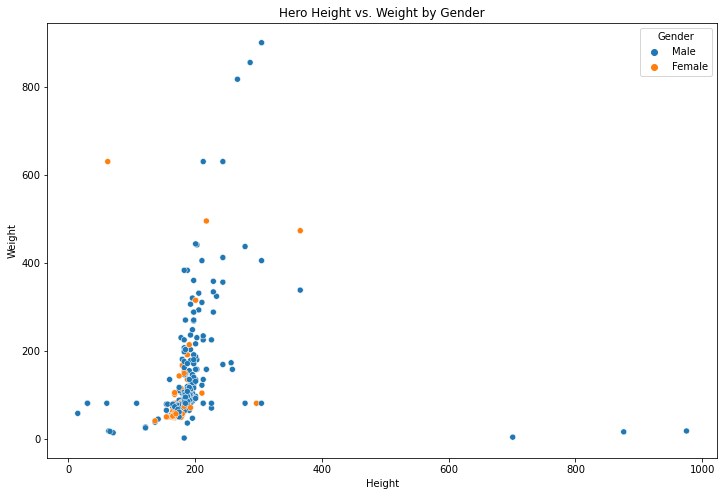

In [29]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', ax=ax)
ax.set_title('Hero Height vs. Weight by Gender')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [51]:
def outliers(series):
    q1 = series.quantile(0.25, interpolation='midpoint')
    q3 = series.quantile(0.75, interpolation='midpoint')
    iqr = q3 - q1
    min_cut = q1 - 1.5 * iqr
    max_cut = q3 + 1.5 * iqr
    return (series < min_cut) + (series > max_cut)

In [75]:
def show_distplot(dataframe, gender, column_name):
    grouped = dataframe.groupby('Gender')
    data = grouped[column_name].get_group(gender)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sns.distplot(data, ax=ax)
    ax.set_title(f'{gender} Hero {column_name}'.title())
    ax.axvline(x=data.median(), color='r', linewidth=0.5)

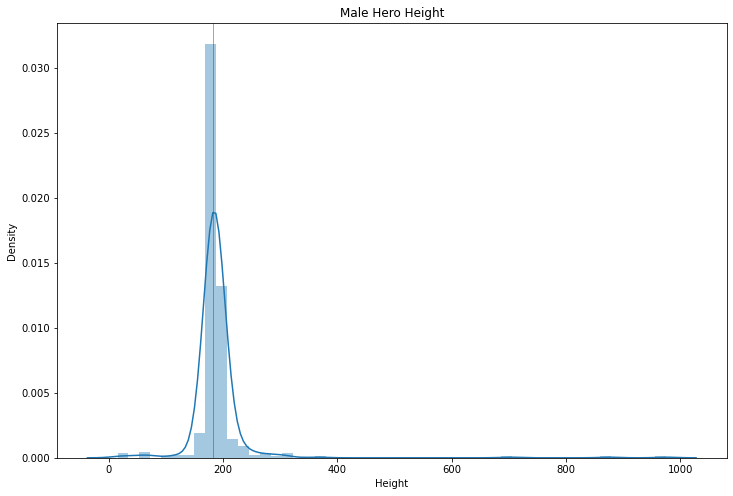

In [76]:
# Male Height
show_distplot(df, 'Male', 'Height')

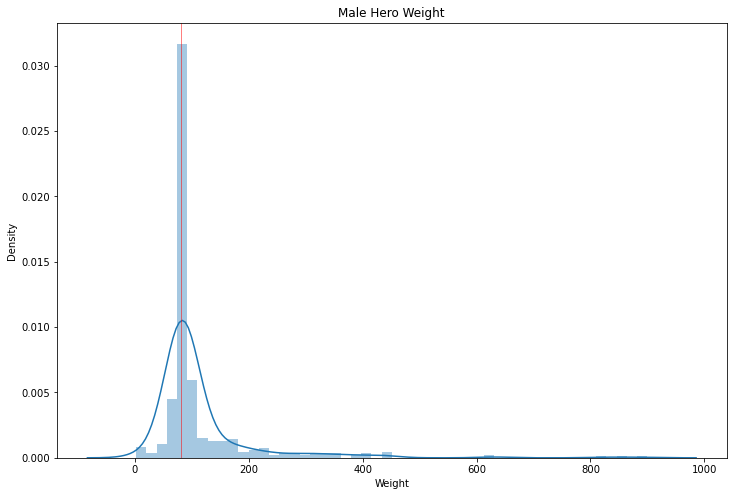

In [77]:
# Male Weight
show_distplot(df, 'Male', 'Weight')

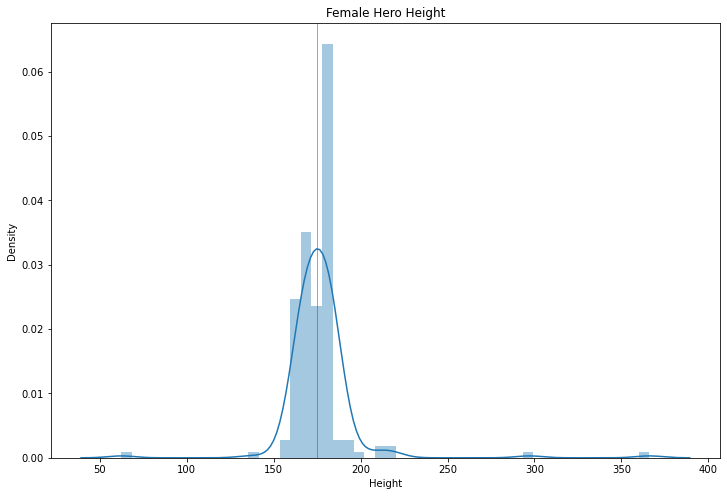

In [78]:
# Female Height
show_distplot(df, 'Female', 'Height')

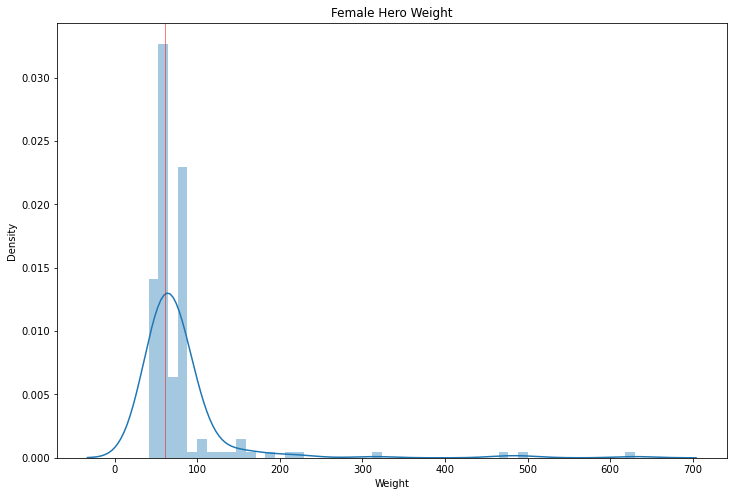

In [79]:
# Female Weight
show_distplot(df, 'Female', 'Weight')

In [80]:
df.groupby('Gender').describe()

Height                                                          Weight  \
        count        mean        std   min    25%    50%    75%    max  count   
Gender                                                                          
Female  174.0  176.767241  21.772181  62.5  168.0  175.0  183.0  366.0  174.0   
Male    469.0  189.823028  60.104430  15.2  183.0  183.0  188.0  975.0  469.0   

                                                               
              mean        std   min   25%   50%    75%    max  
Gender                                                         
Female   80.505747  69.308871  41.0  54.0  61.0   81.0  630.0  
Male    113.650320  97.591844   2.0  81.0  81.0  101.0  900.0

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

In each distribution there are many outliers, which is to be expected for a dataset of fictional superheroes.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data